In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
file_path = '/home/hwang/SIB/dataset/example_log.csv'

x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']] 
y_names = ['a', 's', 'd', 'f']

col_names = x_names + y_names

df = pd.read_csv(file_path, names=col_names)

In [14]:
df = df.iloc[df.index[:340]]

In [15]:
df.describe()

,L0x,L0y,L0z,L1x,L1y,L1z,L2x,L2y,L2z,L3x,...,L19x,L19y,L19z,L20x,L20y,L20z,a,s,d,f
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,...,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,0.719941,0.269655,-0.000048,0.666041,0.289558,-0.023856,0.623224,0.334565,-0.066522,0.597880,...,0.739939,0.458818,-0.216369,0.728462,0.491168,-0.230317,0.100000,0.117647,0.111765,0.105882
std,0.026315,0.013002,0.000027,0.021412,0.011824,0.012779,0.020904,0.011737,0.016723,0.021477,...,0.039299,0.018307,0.022162,0.038803,0.017378,0.029003,0.300442,0.322665,0.315541,0.308140
min,0.254978,0.242139,-0.000172,0.305112,0.275071,-0.058577,0.328183,0.323878,-0.108724,0.344311,...,0.181324,0.395153,-0.286815,0.198124,0.410578,-0.319444,0.000000,0.000000,0.000000,0.000000
25%,0.718412,0.261132,-0.000061,0.664340,0.281764,-0.032967,0.620321,0.328141,-0.078453,0.593376,...,0.734270,0.451206,-0.228388,0.718368,0.484919,-0.247615,0.000000,0.000000,0.000000,0.000000
50%,0.722139,0.266039,-0.000049,0.666489,0.285592,-0.020605,0.621958,0.331985,-0.062681,0.595473,...,0.746823,0.460792,-0.217191,0.734607,0.495038,-0.230643,0.000000,0.000000,0.000000,0.000000
75%,0.726273,0.276194,-0.000036,0.668647,0.292817,-0.014170,0.623731,0.336765,-0.053552,0.597932,...,0.753256,0.472142,-0.203575,0.744149,0.501400,-0.212657,0.000000,0.000000,0.000000,0.000000
max,0.733586,0.315520,0.000039,0.726012,0.348774,0.000405,0.726261,0.409583,-0.033014,0.723193,...,0.768643,0.495404,-0.094347,0.764637,0.521641,-0.084709,1.000000,1.000000,1.000000,1.000000


In [16]:
landmark = ['WRIST', 
            'THUMB_CMC',         'THUMB_MCP',         'THUMB_IP',          'THUMB_TIP', 
            'INDEX_FINGER_MCP',  'INDEX_FINGER_PIP',  'INDEX_FINGER_DIP',  'INDEX_FINGER_TIP',
            'MIDDLE_FINGER_MCP', 'MIDDLE_FINGER_PIP', 'MIDDLE_FINGER_DIP', 'MIDDLE_FINGER_TIP',
            'RING_FINGER_MCP',   'RING_FINGER_PIP',   'RING_FINGER_DIP',   'RING_FINGER_TIP',
            'PINKY_MCP',         'PINKY_PIP',         'PINKY_DIP',         'PINKY_TIP']

In [17]:
df.columns

Index(['L0x', 'L0y', 'L0z', 'L1x', 'L1y', 'L1z', 'L2x', 'L2y', 'L2z', 'L3x',
       'L3y', 'L3z', 'L4x', 'L4y', 'L4z', 'L5x', 'L5y', 'L5z', 'L6x', 'L6y',
       'L6z', 'L7x', 'L7y', 'L7z', 'L8x', 'L8y', 'L8z', 'L9x', 'L9y', 'L9z',
       'L10x', 'L10y', 'L10z', 'L11x', 'L11y', 'L11z', 'L12x', 'L12y', 'L12z',
       'L13x', 'L13y', 'L13z', 'L14x', 'L14y', 'L14z', 'L15x', 'L15y', 'L15z',
       'L16x', 'L16y', 'L16z', 'L17x', 'L17y', 'L17z', 'L18x', 'L18y', 'L18z',
       'L19x', 'L19y', 'L19z', 'L20x', 'L20y', 'L20z', 'a', 's', 'd', 'f'],
      dtype='object')

In [18]:
a = df[['L0x']]
a

,L0x
0,0.722763
1,0.722407
2,0.723790
3,0.727281
4,0.729255
...,...
335,0.720793
336,0.722729
337,0.722611
338,0.722479


In [19]:
scaler = StandardScaler()
scaler.fit(a)
b = scaler.transform(a)

In [21]:
scaler = RobustScaler()
scaler.fit(a)
c = scaler.transform(a)

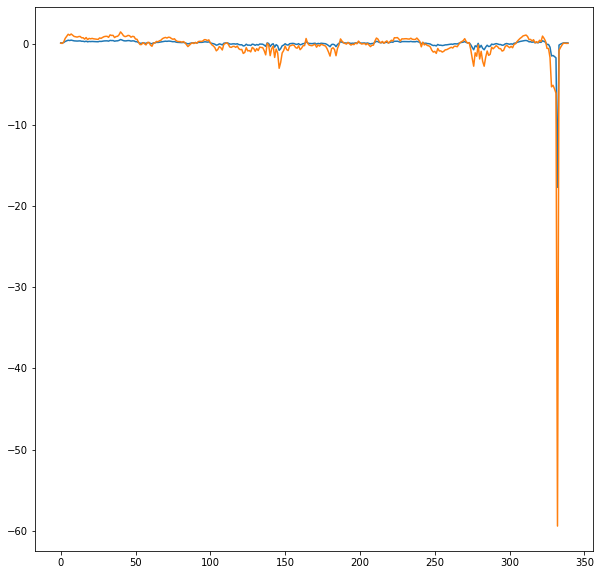

In [22]:
plt.figure(figsize=(10, 10))

plt.plot(b)
plt.plot(c)

plt.show()